In [27]:
import os
import glob

import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
BASE_DIR = "/working/"
INPUT_DIR = os.path.join(BASE_DIR, "input")
CFG = {
    "TRAIN_INK_CSV" : [os.path.join(INPUT_DIR, "train", "1", "inklabels_rle.csv"),
                        os.path.join(INPUT_DIR, "train", "2", "inklabels_rle.csv"),
                        os.path.join(INPUT_DIR, "train", "3", "inklabels_rle.csv"),
                        ],
    "TEST_CSV" : os.path.join(INPUT_DIR, "test.csv"),
    "SUB_CSV" : os.path.join(INPUT_DIR, "sample_submission.csv"),
}

In [29]:
sub = pd.read_csv(CFG["SUB_CSV"])
display(sub.head())

,Id,Predicted
0,a,1 1 5 1
1,b,10 20


In [30]:
train = pd.read_csv(CFG["TRAIN_INK_CSV"][0])

In [31]:
train.head()

,Id,Predicted
0,1,606211 19 612538 26 618867 39 625196 44 631525...


In [32]:
inklabel_path = os.path.join(INPUT_DIR, "train", "1", "inklabels.png")
ir_path = os.path.join(INPUT_DIR, "train", "1", "ir.png")
mask_path = os.path.join(INPUT_DIR, "train", "1", "mask.png")

inklabel_mask = cv2.imread(inklabel_path, cv2.IMREAD_GRAYSCALE)
ir = cv2.imread(ir_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

print(inklabel_mask.shape)
print(ir.shape)
print(mask.shape)

(8181, 6330)
(8181, 6330)
(8181, 6330)


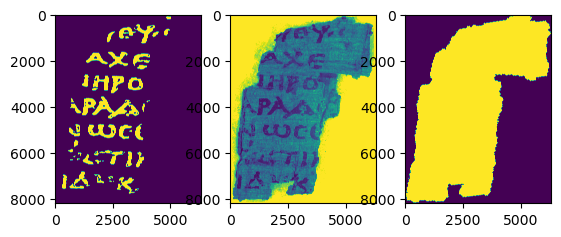

In [33]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(inklabel_mask)
plt.subplot(1,3,2)
plt.imshow(ir)
plt.subplot(1,3,3)
plt.imshow(mask)

In [44]:
surface_vol_list = glob.glob(os.path.join(INPUT_DIR, "train", "1", "surface_volume", "*.tif"))
print(len(surface_vol_list))

surface_vol_list_2 = glob.glob(os.path.join(INPUT_DIR, "train", "2", "surface_volume", "*.tif"))
print(len(surface_vol_list))

surface_vol_list_3 = glob.glob(os.path.join(INPUT_DIR, "train", "3", "surface_volume", "*.tif"))
print(len(surface_vol_list))



65
65
65


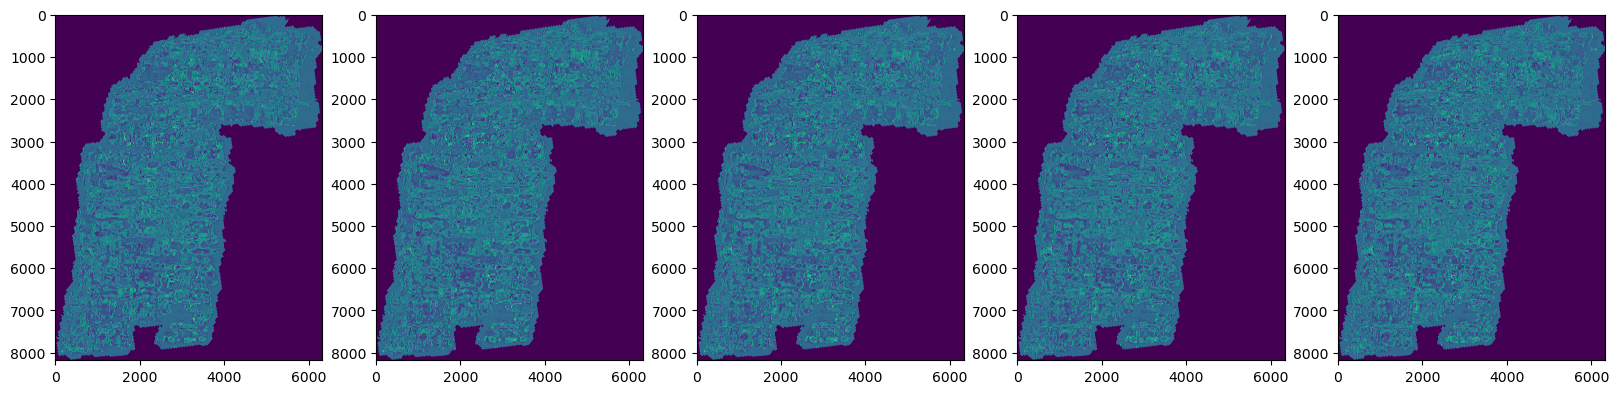

In [43]:
subplot_num = 5
plt.figure(figsize=(20, 20))
for i in range(subplot_num):
    plt.subplot(1, subplot_num, i+1)
    surface_img = cv2.imread(surface_vol_list[i], cv2.IMREAD_GRAYSCALE)
    plt.imshow(surface_img)